## Report

### EDA on dataset

In [49]:
import numpy as np
from data import *
from network import *
import matplotlib.pyplot as plt
import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
train_datas = load_data(train = True) #load train data
Images=train_datas[0]
labels=train_datas[1]
random_idx=np.random.choice(np.arange(50001), size=1000, replace=False)
random_images=Images[random_idx]
random_labels=labels[random_idx]

In [51]:
random_images.max(axis=0)

array([255., 255., 255., ..., 255., 255., 255.])

In [52]:
train_datas = load_data(train = True) #load train data

# retrieve binary data for labels 0 and 5
X=[]
Y=[]
for i in range(len(train_datas[0])):
    if i%10000 ==0:
        print(i) 
    #0 vs 5
    if train_datas[1][i] == 0 or train_datas[1][i] == 5:
        X.append(train_datas[0][i])
        Y.append(train_datas[1][i])
    # 3 vs 5
    #if train_datas[1][i] == 3 or train_datas[1][i] == 5:
    #   X.append(train_datas[0][i])
    #   Y.append(train_datas[1][i])
    

X=np.array(X)
Y=np.array(Y)
train_datas = (X,Y)

#changing labels from 5 to 1
for i in range(len(Y)):
    if Y[i]==5:
        Y[i] =1

#normalized features
for i in range(len(X)):
    #X[i] = z_score_normalize(X[i])[0]
    X[i] = min_max_normalize(X[i])[0]

#shuffle datas
train_datas = shuffle(train_datas)

train_datastrain = True

0
10000
20000
30000
40000


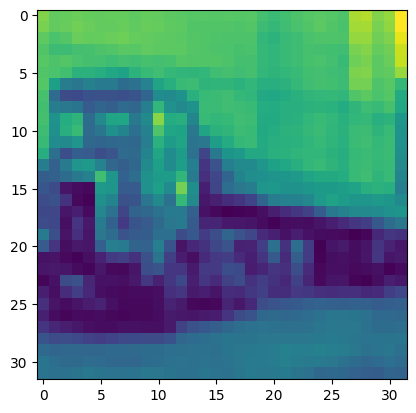

In [53]:
from matplotlib import pyplot as plt
plt.imshow(random_images[0].reshape(32,32), interpolation='nearest')
plt.show()

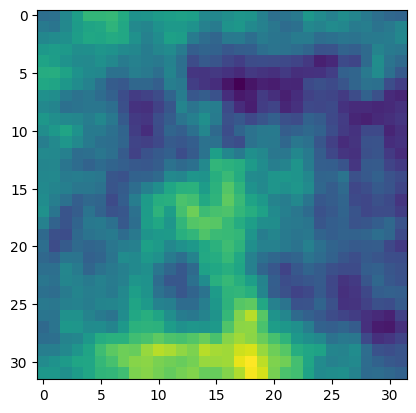

In [54]:
plt.imshow(random_images[random_labels==3].mean(axis=0).reshape(32,32), interpolation='nearest')
plt.show()

In [58]:
train = load_data(train = True) #load train data

In [59]:
airplanes=train[0][train[1]==0]
dogs=train[0][train[1]==5]
cats=train[0][train[1]==3]

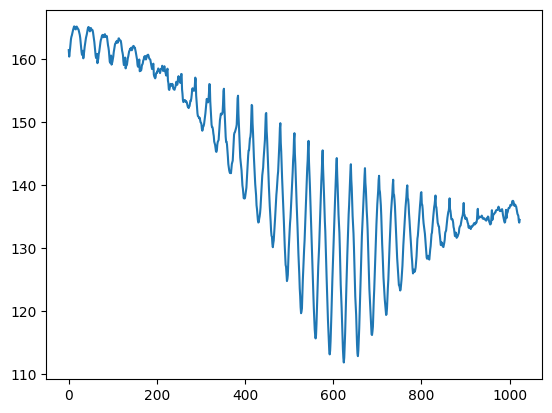

In [60]:
plt.plot(airplanes.mean(axis=0))

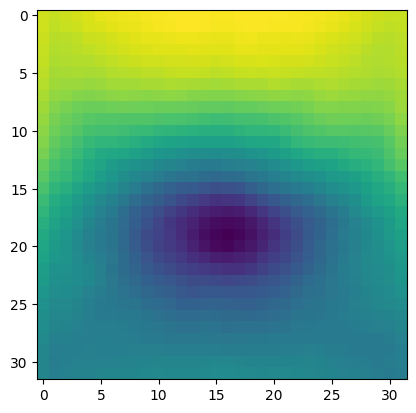

In [61]:
plt.imshow((airplanes.mean(axis=0).reshape(32,32)))

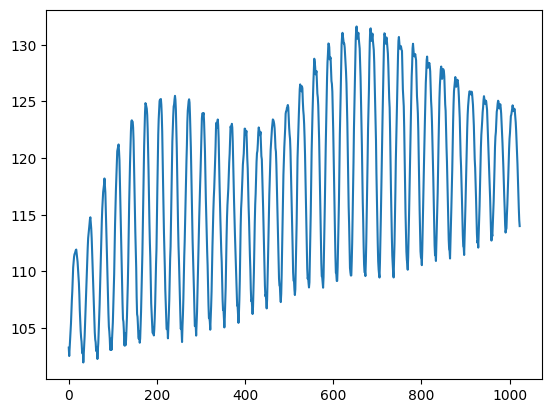

In [62]:
plt.plot(dogs.mean(axis=0))


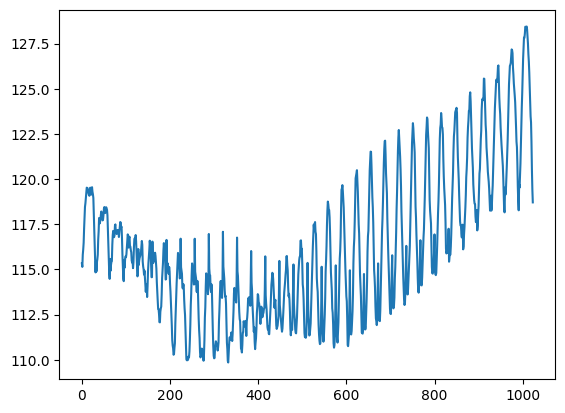

In [63]:
plt.plot(cats.mean(axis=0))



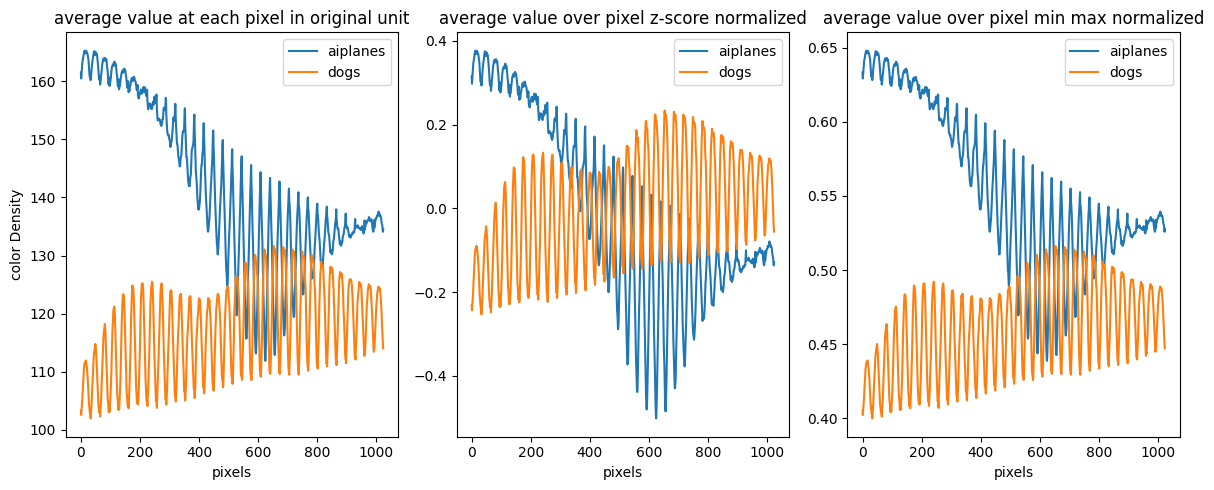

In [64]:
#Avergae Color Density at Each pixel
fig,axes=plt.subplots(1,3,figsize=(12,5))
#Original Unit
ax=axes[0]
ax.plot(airplanes.mean(axis=0), label='aiplanes')
ax.plot(dogs.mean(axis=0),label='dogs')
ax.set_title('average value at each pixel in original unit')
ax.legend()
ax.set_xlabel('pixels')
ax.set_ylabel('color Density')
#
ax=axes[1]
ax.plot(z_score_normalize(airplanes)[0].mean(axis=0), label='aiplanes')
ax.plot(z_score_normalize(dogs)[0].mean(axis=0),label='dogs')
ax.set_title('average value over pixel z-score normalized')
ax.set_xlabel('pixels')
ax.legend()
ax=axes[2]
ax.plot(min_max_normalize(airplanes)[0].mean(axis=0), label='aiplanes')
ax.plot(min_max_normalize(dogs)[0].mean(axis=0),label='dogs')
ax.set_title('average value over pixel min max normalized')
ax.set_xlabel('pixels')
ax.legend()

fig.tight_layout()

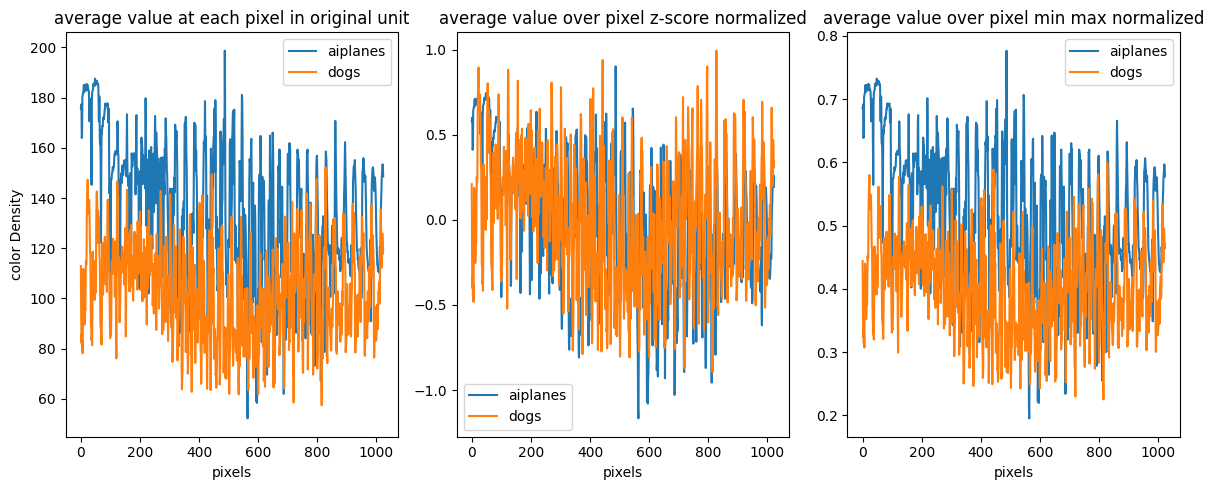

In [65]:
#Avergae Color Density at Each pixel for average over 5 images
fig,axes=plt.subplots(1,3,figsize=(12,5))
#Original Unit
ax=axes[0]
ax.plot(airplanes[:5].mean(axis=0), label='aiplanes')
ax.plot(dogs[:5].mean(axis=0),label='dogs')
ax.set_title('average value at each pixel in original unit')
ax.legend()
ax.set_xlabel('pixels')
ax.set_ylabel('color Density')
#
ax=axes[1]
ax.plot(z_score_normalize(airplanes[:5])[0].mean(axis=0), label='aiplanes')
ax.plot(z_score_normalize(dogs[:5])[0].mean(axis=0),label='dogs')
ax.set_title('average value over pixel z-score normalized')
ax.set_xlabel('pixels')
ax.legend()
ax=axes[2]
ax.plot(min_max_normalize(airplanes[:5])[0].mean(axis=0), label='aiplanes')
ax.plot(min_max_normalize(dogs[:5])[0].mean(axis=0),label='dogs')
ax.set_title('average value over pixel min max normalized')
ax.set_xlabel('pixels')
ax.legend()

fig.tight_layout()

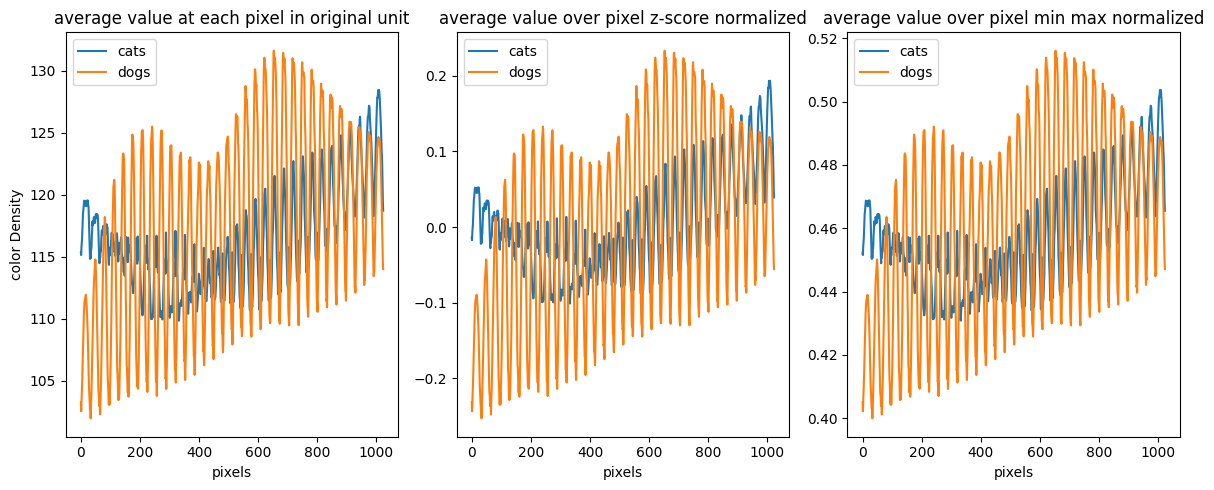

In [66]:
#Avergae Color Density at Each pixel Cat vs Dog
fig,axes=plt.subplots(1,3,figsize=(12,5))
#Original Unit
ax=axes[0]
ax.plot(cats.mean(axis=0), label='cats')
ax.plot(dogs.mean(axis=0),label='dogs')
ax.set_title('average value at each pixel in original unit')
ax.legend()
ax.set_xlabel('pixels')
ax.set_ylabel('color Density')
#
ax=axes[1]
ax.plot(z_score_normalize(cats)[0].mean(axis=0), label='cats')
ax.plot(z_score_normalize(dogs)[0].mean(axis=0),label='dogs')
ax.set_title('average value over pixel z-score normalized')
ax.set_xlabel('pixels')
ax.legend()
ax=axes[2]
ax.plot(min_max_normalize(cats)[0].mean(axis=0), label='cats')
ax.plot(min_max_normalize(dogs)[0].mean(axis=0),label='dogs')
ax.set_title('average value over pixel min max normalized')
ax.set_xlabel('pixels')
ax.legend()

fig.tight_layout()

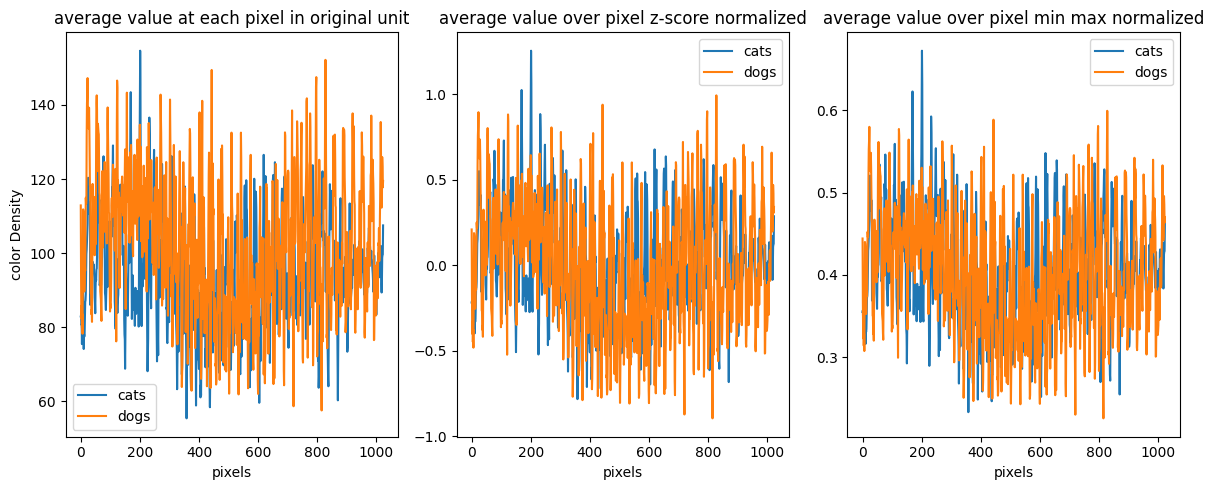

In [67]:
#Avergae Color Density at Each pixel Cat vs Dog
fig,axes=plt.subplots(1,3,figsize=(12,5))
#Original Unit
ax=axes[0]
ax.plot(cats[:5].mean(axis=0), label='cats')
ax.plot(dogs[:5].mean(axis=0),label='dogs')
ax.set_title('average value at each pixel in original unit')
ax.legend()
ax.set_xlabel('pixels')
ax.set_ylabel('color Density')
#
ax=axes[1]
ax.plot(z_score_normalize(cats[:5])[0].mean(axis=0), label='cats')
ax.plot(z_score_normalize(dogs[:5])[0].mean(axis=0),label='dogs')
ax.set_title('average value over pixel z-score normalized')
ax.set_xlabel('pixels')
ax.legend()
ax=axes[2]
ax.plot(min_max_normalize(cats[:5])[0].mean(axis=0), label='cats')
ax.plot(min_max_normalize(dogs[:5])[0].mean(axis=0),label='dogs')
ax.set_title('average value over pixel min max normalized')
ax.set_xlabel('pixels')
ax.legend()

fig.tight_layout()

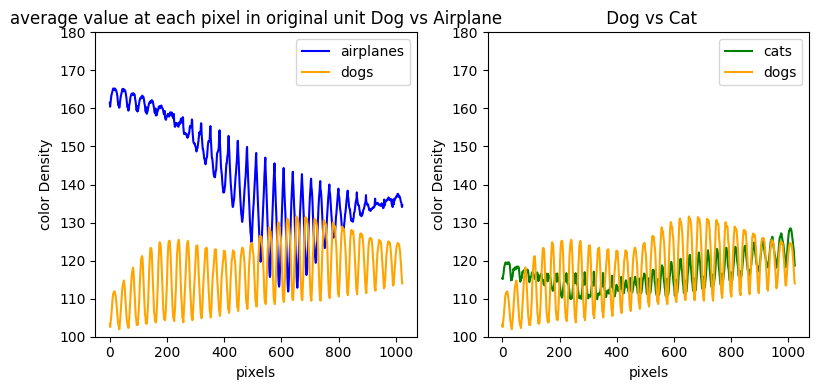

In [80]:
#Avergae Color Density at Each pixel airplane vs Dog VS Cat vs Dog
fig,axes=plt.subplots(1,2,figsize=(8,4))
#Original Unit
ax=axes[0]
ax.plot(airplanes.mean(axis=0), label='airplanes',c='blue')
ax.plot(dogs.mean(axis=0),label='dogs',c='orange')
ax.set_title('average value at each pixel in original unit Dog vs Airplane')
ax.legend()
ax.set_xlabel('pixels')
ax.set_ylabel('color Density')
ax.set_ylim(100,180)
#
ax=axes[1]
ax.plot(cats.mean(axis=0), label='cats',c='green')
ax.plot(dogs.mean(axis=0),label='dogs',c='orange')
ax.set_title(' Dog vs Cat')
ax.legend()
ax.set_xlabel('pixels')
ax.set_ylabel('color Density')
ax.set_ylim(100,180)
fig.tight_layout()

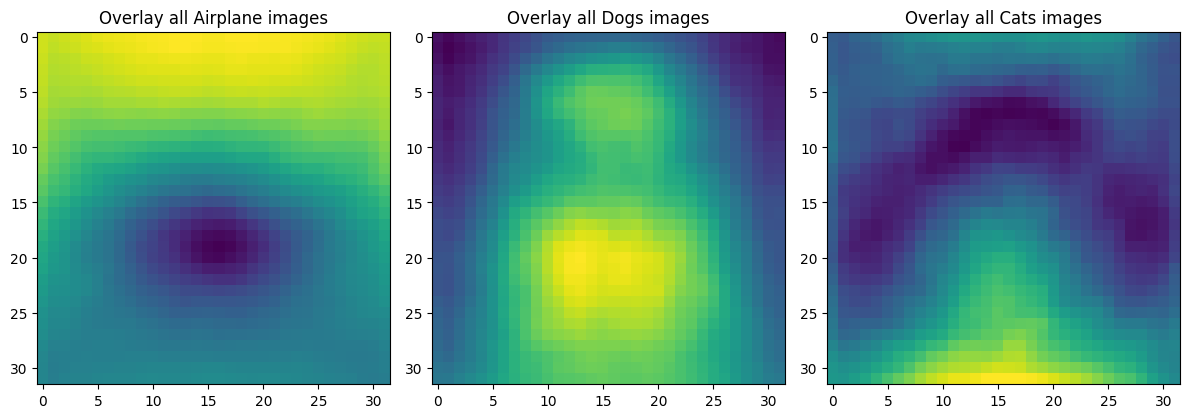

In [84]:
fig,axes=plt.subplots(1,3,figsize=(12,4))
#Original Unit
ax=axes[0]
ax.imshow(airplanes.mean(axis=0).reshape(32,32))
ax.set_title('Overlay all Airplane images')
#
ax=axes[1]
ax.imshow(dogs.mean(axis=0).reshape(32,32))
ax.set_title('Overlay all Dogs images')
ax=axes[2]
ax.imshow(cats.mean(axis=0).reshape(32,32))
ax.set_title('Overlay all Cats images')

fig.tight_layout()